In [1]:
from qepy import *
from yambopy import *
from qepy import PwIn
import matplotlib.pyplot as plt
import numpy as np
import GW_Routines as GW
import TD_Routines as TD

In [2]:
mpi = 8 #16 #32
omp = 1

## Time dependent analysis 

Define the basis parameters of the RT simulation common to all the computation. Different values of the field intensity are considered and the yambo dictionary contains a key which parametrize this quantity.

In [37]:
fieldFreq = 2.56 #eV
fieldWidth = 20 #fs
fieldDirection = [1.0,1.0,1.0]
RTstep = 2.0 #as - time step
NETime = 120.0 #fs - total simulation time
RTbands = [2,7] # the KS bands involved in the simulation

In [126]:
# contains the parameters of the yambo_rt input file
rt_parameters = {
     'Field1_Freq'  : [[fieldFreq,fieldFreq],'eV'],
     'Field1_Width' : [fieldWidth,'fs'],
     'Field1_kind'  : 'QSSIN',
     'Field1_pol'   : 'linear',
     'Field1_Dir'   : fieldDirection,
     'RTstep'       : [RTstep,'as'],
     'NETime'       : [NETime,'fs'],
     'RTBands'      : RTbands,
     'IOtime'       : [[1.0,5.0,1.0],'fs'], # Carriers - GF - output
     'GfnQP_Wv'     : [0.05,0.00,0.00],     # Constant damping valence
     'GfnQP_Wc'     : [0.05,0.00,0.00],     # Constant damping conduction
     #'GfnQP_E'      : [0.00, 1.00, 1.00], 
     'RT_CPU'       : "%s.1.1.1"%mpi
}
#rt_parameters

In [110]:
# Set the values of the intensity of the field
fieldInt = [100.0] # [0.,100.,200.]  #kWLm2

Choose a value of kpoints and the direction of the perturbing field. Create the fixSymm folder that contain the SAVE folder compatible with the simmetries broken by the perturbation. This folder is working path of the RT simulation. Create the yambo dictionary.

In [111]:
kfold = 'yambo/k8'
path = TD.fixSymm(kfold,fieldDirection)
print 'path : ',path

FixSymm folder already created
path :  yambo/k8/FixSymm


In [112]:
yambo = dict()
for f in fieldInt:
    yambo[f] = {}
yambo

{100.0: {}}

In [122]:
def makeRTinputFile(path,fname='rt_default.in',**kwargs):
    """
    Build the input file for a RT simulation in the independent particle approximation.
    """
    y = YamboIn('yambo_rt -q p -v ip -V qp',folder=path)
    for k,v in kwargs.iteritems():
        y[k] = v
    y.write(path+'/'+fname)

def buildRT(dic,path,rt_par):
    """
    Update the yambo dictionary with the parameters of the choosen RT computations and make the associated 
    RT input file 
    """
    fieldInt = dic.keys()
    for f in fieldInt:
        rt_par['Field1_Int'] = [f,'kWLm2']
        radical = 'rt_int'+str(int(f))+'_freq'+str(rt_par['Field1_Freq'][0][0])+'_step'+str(rt_par['RTstep'][0])
        inputFile = radical+'.in'
        jobName = radical
        outputFile = path+'/'+jobName+'/'+'o-'+radical+'.carriers'
        dic[f]['rt'] = {'inpf' : inputFile, 'jobn' : jobName, 'outf' : outputFile}
        
        makeRTinputFile(path,fname = inputFile, **rt_par)

In [123]:
buildRT(yambo,path,rt_parameters)
yambo

In [119]:
def runYambo_rt(path,filename,jobname,mpi,omp):
    """
    Run a single Yambo_rt computation and delete the jobname folder is exsists
    """
    jobDirPath = path+'/'+jobname
    if os.path.isdir(jobDirPath):
        print 'delete '+ jobDirPath
        os.system("rm -r %s"%jobDirPath)
    osString = "cd %s ; "%path
    osString += "OMP_NUM_THREADS=%d mpirun -np %d yambo_rt -F %s -J %s -C %s"%(omp,mpi,filename,jobname,jobname)
    print 'execute : '+osString
    os.system(osString)
    print 'done!'

In [120]:
def runRT(dic,path,mpi,omp,skip = False):
    """
    Run a bunch of RT simulations
    """
    for f,y in dic.iteritems():
        if skip:
            if os.path.isfile(y['rt']['outf']):
                print 'skip the computation for : ',y['rt']['outf']
            else:
                runYambo_rt(path,y['rt']['inpf'],y['rt']['jobn'],mpi,omp)
        else:
            runYambo(folder,y['rt']['inpf'],y['jobn'],mpi,omp)

In [125]:
runRT(yambo,path,mpi,omp,True)

execute : cd yambo/k8/FixSymm ; OMP_NUM_THREADS=1 mpirun -np 8 yambo_rt -F rt_int100_freq2.56_step2.0.in -J rt_int100_freq2.56_step2.0 -C rt_int100_freq2.56_step2.0
done!


In [ ]:
#######################################################################################

In [3]:
# Field parameters
fieldInt =  [0,100,200]  #kWLm2
fieldFreq = 2.56 #eV
fieldWidth = 20 #fs

# Simulation parameters
RTstep = 2.0 #as - time step
NETime = 120.0 #fs - total simulation time
RTbands = [2,7] # the KS bands involved in the simulation

# Parallelization
RT_CPU = "%s.1.1.1"%mpi

Choose a value of kpoints and the direction of the perturbing field. Create the fixSymm folder that contain the SAVE folder compatible with the simmetries broken by the perturbation. This folder is working path of the RT simulation. Create the yambo dictionary.

In [5]:
kfold = 'yambo/k8'
fieldDirection = [1.0,1.0,1.0]
path = TD.fixSymm(kfold,fieldDirection)
print 'path : ',path

FixSymm folder already created
path :  yambo/k8/FixSymm


In [6]:
yambo = dict()
for f in fieldInt:
    yambo[f] = {}

In [7]:
yambo

{0: {}, 100: {}, 200: {}}

In [24]:
def man(name = 'marco', age = 42):
    print name
    print age

In [26]:
man(name = 'pippo')

pippo
42


In [40]:
def makeRTinputFile(path,fname='rt_default.in',**kwargs):
    """
    Build the input file for a RT simulation in the independent particle approximation.
    Set the relevant parameters for the field and the simulation options.
    """
    y = YamboIn('yambo_rt -q p -v ip -V qp',folder=path)
    for k,v in kwargs.iteritems():
        y[k] = v
    y.write(path+'/'+fname)
    

In [43]:
makeRTinputFile(path,Field1_kind='QSSIN')

In [22]:
def makeTDinput(path=fold,fname=fn,fieldDirection=fDir,fieldInt=fInt,fieldFreq=fFreq,fieldWidth=fWidth,RTstep=step,NETime=time,RTbands=bnds,RT_CPU=cpu):
    y = YamboIn('yambo_rt -q p -v ip -V qp',folder=fold)
    """
    Build the input file for a RT simulation in the "independt particle" approximation.
    Set the relevant parameters for the field and the simulation options.
    """
    # field paramters
    y['Field1_kind'] = 'QSSIN'
    y['Field1_pol'] = 'linear'
    y['Field1_Dir'] = fDir
    y['Field1_Int'] = [fInt,'kWLm2']
    y['Field1_Freq'] = [[fFreq,fFreq],'eV']
    y['Field1_Width'] = [fWidth,'fs']
    # simulation parameters
    y['IOtime'] = [[1.0,5.0,0.5],'fs'] #(J,P,CARRIERs - GF - OUTPUT)
    y['RTstep'] = [step,'as']
    y['NETime'] = [time,'fs']
    y['RTBands'] = bnds
    # parameters from yambopy tutorial rt_si.py
    y['GfnQP_Wv']   = [0.05,0.00,0.00]    # Constant damping valence
    y['GfnQP_Wc']   = [0.05,0.00,0.00]    # Constant damping conduction
    y['GfnQP_E']    = [0.00, 1.00, 1.00]  # [EXTQP BSK BSS] E parameters  (c/v) eV|adim|adim

    # parallelization parameters
    y['RT_CPU'] = cpu
    y.write(fold+'/'+fn)

NameError: name 'fold' is not defined

In [17]:
def buildRT(dic,**kwargs):
    """
    Build the input file for a yambo RT computation and update the yambo dictionary
    with the parameters of the choosen RT computations. 
    """
    fieldInt = dic.keys()
    for f in fieldInt:
        dic[f]['rt'] = {}
    for k,v in kwargs.iteritems():
        print k,v

In [19]:
buildRT(yambo,val1 = 1, pippo = 2)
yambo

pippo 2
val1 1


{0: {'rt': {}}, 100: {'rt': {}}, 200: {'rt': {}}}

In [8]:
reload(TD)
rtinput = 'rt_field'+str(fieldInt)+'_step'+str(RTstep)+'_bnd'+str(RTbands[0])+'-'+str(RTbands[1])+'.in'
rtoutFold = 'rt_field'+str(fieldInt)+'_step'+str(RTstep)+'_bnd'+str(RTbands[0])+'-'+str(RTbands[1])
TD.makeTDinput(path,rtinput,fieldDirection,fieldInt,fieldFreq,fieldWidth,RTstep,NETime,RTbands,RT_CPU)

In [108]:
#skip must be added....
#check if it useful to run yambo without deleting the job folder. What appens in this case?
TD.runYambo_rt(path,rtinput,rtoutFold,mpi,omp)

execute : cd yambo/k8/FixSymm ; OMP_NUM_THREADS=1 mpirun -np 8 yambo_rt -F rt_field500_step1.0_bnd2-7.in -J rt_field500_step1.0_bnd2-7 -C rt_field500_step1.0_bnd2-7
done!


In [9]:
# parse the output files for data analysis

In [10]:
eFieldOut = 'o-'+rtoutFold+'.external_field'
carriesOut ='o-'+rtoutFold+'.carriers'

In [11]:
larray = GW.parserArrayFromFile(path+os.sep+rtoutFold+os.sep+eFieldOut)
time = []
eInt = []
fluence = []
for l in larray:
    time.append(l[0])
    eInt.append(l[7])
    fluence.append(100*l[8])

In [17]:
%matplotlib auto
plt.plot(time,eInt)
plt.plot(time,fluence)
plt.show()

Using matplotlib backend: TkAgg


In [13]:
larray = GW.parserArrayFromFile(path+os.sep+rtoutFold+os.sep+carriesOut)
time = []
dnElec = []
dnHoles = []
for l in larray:
    time.append(l[0])
    dnElec.append(l[2])
    dnHoles.append(l[3])

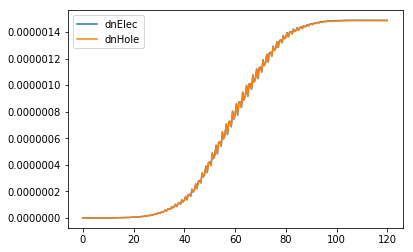

In [18]:
%matplotlib inline
plt.plot(time,dnElec,label='dnElec')
plt.plot(time,dnHoles,label='dnHole')
plt.legend()
plt.show()

Per andare avanti.
Guardare nella cartella di yambo-tests
/home/marco/Data/RICERCA/MANY BODY/Test/yambo-tests/TESTS/MAIN/Si_bulk/RT/INPUTS
dove ci sono vari file di input da studiare. In particolare

* si possono generare distribuzioni neq con ypp_rt (anche se ora non mi serve visto che l'ho fatto esplicitamente con il conto rt). Questo è descritto nei file di input 02_carriers_DB_ypp (credo) e si genera con ypp_rt -C (da controllare da -H di ypp_rt)
* fare post processing dei conti rt con ypp_rt. In questo caso si fa ypp_rt -n o e (tutto da controllare) e si generano file tipo 02_carriers_Fermi_fit_DB. Poi con ypp_rt -F <nomefile> -J <nomefoldercontoRT> si ottiene il plot 
* conto COHSEX con occupazioni neq (si fanno conti di tipo COHSEX perchè l'estensione eq->neq funziona in modo semplice solo se la Sigma è reale (o statica?)). Guardare l'input file 08_cohsex_10fs. E' un conto COHSEX standard con la stringa in più
    
    GfnRTdb= "f @ 0.1 ps < <folderconto RT>/ndb.RT_carriers"          # [EXTRT G] Database

la f indica le occupazioni

Ypp_rt post processing

In [19]:
yppTimeStep = 10.0 #fs
ypp_outfold = 'ypp_noe'

In [20]:
reload(TD)
TD.makeYPP_rtOccupationInput(path,RTbands,yppTimeStep)

remove file : yambo/k8/FixSymm/ypp.in
cd yambo/k8/FixSymm; ypp_rt -n o e -V qp


In [21]:
TD.runYPP_rt(path,'ypp.in',rtoutFold,'ypp_noe')

delete yambo/k8/FixSymm/ypp_noe
execute : cd yambo/k8/FixSymm; OMP_NUM_THREADS=1 mpirun -np 1 ypp_rt -F ypp.in -J rt_field100_step1.0_bnd2-7 -C ypp_noe
done!


what to to with these output file?

In [25]:
holes = 'o-'+rtoutFold+'.YPP-RT_occupations_DATA'
electrons = 'o-'+rtoutFold+'.YPP-RT_occupations_FIT_electrons'
val = holes

In [26]:
larray = GW.parserArrayFromFile(path+os.sep+ypp_outfold+os.sep+val)
energy = []
val_t1 = []
val_t2 = []
val_t3 = []
for l in larray:
    energy.append(l[0])
    val_t1.append(l[3])
    val_t2.append(l[7])
    val_t3.append(l[11])

In [31]:
%matplotlib auto
plt.plot(energy,val_t1)
plt.plot(energy,val_t2)
plt.plot(energy,val_t3)
plt.show()

Using matplotlib backend: TkAgg


Now perform a COHSEX calculation on top on the neq distribution

In [135]:
# take the starting point of the COHSEX calculation from the converged parameters of the HF ones
hf_kconv = 8
hf_G0_Gcompconv = 3.0 #Ha

In [136]:
yambo_eq = {8 : {'folder' :'yambo/k8'}}
yambo_neq = {8 : {'folder' :'yambo/k8/FixSymm'}}

In [137]:
W_Gcomp = [5.0] #Ha
W_nb = [50]
# compute the COHSEX correction only for the bands in the range
firstk = 1
lastk = 21 # the k index to compute the indirect band gap
firstbnd = 2
lastbnd = 7

In [138]:
GW.buildCOHSEX(yambo_eq,hf_kconv,hf_G0_Gcompconv,W_Gcomp,W_nb,firstk,lastk,firstbnd,lastbnd)
GW.buildCOHSEX(yambo_neq,hf_kconv,hf_G0_Gcompconv,W_Gcomp,W_nb,firstk,lastk,firstbnd,lastbnd)

In [63]:
# add manually the string
GfnRTdb= "f @ 0.1 ps < rt_field100_step1.0-bnd2-7/ndb.RT_carriers" # [EXTRT G] Database

In [64]:
# l'ho eseguito con yambo dovevo usare yambo_rt? credo sia la stessa cosa...

In [139]:
GW.runCOHSEX(yambo_neq,hf_kconv,mpi,omp,True)
GW.getCOHSEXresults(yambo_neq,hf_kconv)

execute : cd yambo/k8/FixSymm ; OMP_NUM_THREADS=1 mpirun -np 8 yambo -F cs_wGcomp5.0_wNb50.in -J cs_wGcomp5.0_wNb50 -C cs_wGcomp5.0_wNb50
done!
read file : yambo/k8/FixSymm/cs_wGcomp5.0_wNb50/o-cs_wGcomp5.0_wNb50.qp


In [140]:
# reload the computation for the equilibrium case
GW.runCOHSEX(yambo_eq,hf_kconv,mpi,omp,True)
GW.getCOHSEXresults(yambo_eq,hf_kconv)

skip the computation for : yambo/k8/cs_wGcomp5.0_wNb50/o-cs_wGcomp5.0_wNb50.qp
read file : yambo/k8/cs_wGcomp5.0_wNb50/o-cs_wGcomp5.0_wNb50.qp


In [141]:
results_neq = yambo_neq[8]['cs'][(5.0,50)]['results']
results_eq = yambo_eq[8]['cs'][5.0,50]['results']

In [142]:
print 'equilibrium indirect gap = ', GW.getBandGap(results_eq,4,5,1,21)
print 'non-equilibrium indirect gap = ', GW.getBandGap(results_neq,4,5,1,21)

equilibrium indirect gap =  1.773443
non-equilibrium indirect gap =  1.742104


In [143]:
# mi sembra che il risultato neq non sia dipendente dall'intensità del campo...

In [ ]:
# modifica di ven 30/11 ore 15.02